In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv("world_data.csv")

In [3]:
df.head()

,geo,country,world_6region,world_4region,year,population,gdppc_cppp,life_expectency
0,afg,Afghanistan,south_asia,asia,1800,3280000,603.0,28.21
1,afg,Afghanistan,south_asia,asia,1801,3280000,603.0,28.20
2,afg,Afghanistan,south_asia,asia,1802,3280000,603.0,28.19
3,afg,Afghanistan,south_asia,asia,1803,3280000,603.0,28.18
4,afg,Afghanistan,south_asia,asia,1804,3280000,603.0,28.17


In [4]:
df_2020 = df[df.year == 2020]
len(df_2020)

185

In [5]:
# normalize population within 1 and 500
scaler = preprocessing.MinMaxScaler(feature_range = (1, 500))
df_2020['population'] = scaler.fit_transform(df_2020[['population']])

C:\Users\fongc\AppData\Local\Temp\ipykernel_9264\1496467352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['population'] = scaler.fit_transform(df_2020[['population']])


In [6]:
df_2020['world_4region'].unique()

array(['asia', 'europe', 'africa', 'americas'], dtype=object)

In [7]:
# map world_4region to colors
color_map = {'asia': 'red', 'europe': 'blue', 'africa': 'green', 'americas': 'orange'}

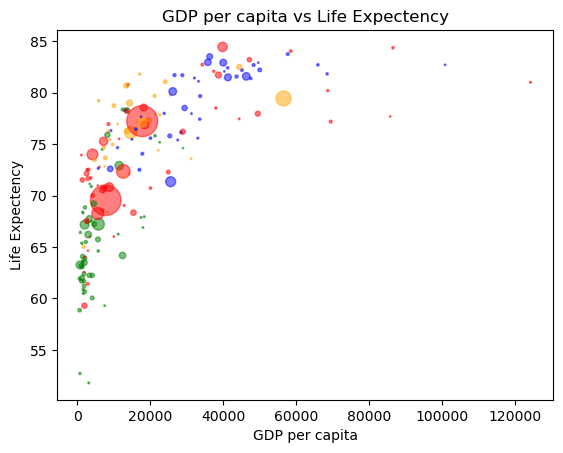

In [8]:
plt.scatter(
    df_2020['gdppc_cppp'],
    df_2020['life_expectency'],
    s = df_2020['population'],
    c = df_2020['world_4region'].map(color_map),
    cmap = 'viridis',
    marker = 'o',
    alpha = 0.5
)
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectency')
plt.title('GDP per capita vs Life Expectency')
plt.show()